<a href="https://colab.research.google.com/github/bntumb/Neural-Networks-Module-CE889/blob/main/Neural_Net_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Ben-Elie Ntumba


# **Loading data**

Data will be used for MLP inputs and outputs


In [38]:
import numpy as np
import pandas as pd
import math
import io

In [39]:
training_data_file = 'https://raw.githubusercontent.com/bntumb/Neural-Networks-Module-CE889/main/train.csv'
training_data = pd.read_csv(training_data_file)
training_data.columns=['input1','input2','output1','output2']

In [40]:
training_data.head()

,input1,input2,output1,output2
0,0.458079,0.082555,0.601961,0.758659
1,0.381397,0.900807,0.248768,0.523801
2,0.399749,0.838377,0.391700,0.525063
3,0.552420,0.333605,0.770576,0.794773
4,0.366072,0.598240,0.594078,0.319408


In [41]:
inputs = training_data.drop(['output1', 'output2'], axis = 1)
outputs = training_data.drop(['input1', 'input2'], axis = 1)

input_size = len(inputs.columns)
output_size = len(outputs.columns)

inputs = np.array(inputs)
outputs = np.array(outputs)

outputs.shape

(7389, 2)

In [42]:
n = 8
error =[]

class NeuralNetHolder:
    def __init__(self):
        self.p = 0.025
        self.noise = np.random.normal(0,1,100)
        self.learning_rate = 1.5
        self.weights0 =  np.random.randn(input_size, n)* 2 - 1 
        self.weights1 = np.random.randn(n, output_size)* 2 - 1 
        self.epochs = 6000
        self.bias = np.random.randn()
        super().__init__()

    def step_decay(self, epoch):
      drop = 0.2
      epochs_drop = 100.0
      lrate = self.learning_rate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
      return lrate

    def sigmoid(self, sum):
      return 1/(1+np.exp(-sum))
    
    def sigmoid_derivative(self, output):
      return output * (1 - output)
   
    def dropout(self, h_layer ):
      u1 = np.random.binomial(1, self.p, size=h_layer.shape) / self.p
      return u1

    def train_network(self, input_layer, output_layer):
      for epoch in range(self.epochs):
        #input_layer = inputs
        sum_synapse0 = np.dot(input_layer, self.weights0)
        hidden_layer = self.sigmoid(sum_synapse0)
        hidden_layer *= self.dropout(hidden_layer)
        sum_synapse1 = np.dot(hidden_layer, self.weights1)
        output_layer = self.sigmoid(sum_synapse1)

        error_output_layer = outputs - output_layer
        average = np.mean(abs(error_output_layer))

        if epoch % 1000== 0:
          print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
          error.append(average)
        
        derivative_output = self.sigmoid_derivative(output_layer)
        delta_output = error_output_layer * derivative_output
        
        weights1T = self.weights1.T
        delta_output_weight = delta_output.dot(weights1T)
        delta_hidden_layer = delta_output_weight * self.sigmoid_derivative(hidden_layer)
        
        hidden_layer_transpose  = hidden_layer.T
        input_x_delta1 = hidden_layer_transpose .dot(delta_output)
        weights1 = self.weights1 + (input_x_delta1 * self.step_decay(epoch)) #backpropagration
        
        input_layer_transpose  = input_layer.T
        input_x_delta0 = input_layer_transpose .dot(delta_hidden_layer)
        weights0 = self.weights0 + (input_x_delta0 * self.step_decay(epoch))
        
    def predict(self, input_row):
      hidden_layer = self.sigmoid(np.dot(input_row, self.weights0)) + self.bias
      output_layer = self.sigmoid(np.dot(hidden_layer, self.weights1))
      return output_layer




In [43]:
neural_network = NeuralNetHolder()
training_error = neural_network.train_network(inputs, outputs)

Epoch: 1 Error: 0.1892673720066981
Epoch: 1001 Error: 0.18768241147683645
Epoch: 2001 Error: 0.19084021288696143
Epoch: 3001 Error: 0.18899678920521726
Epoch: 4001 Error: 0.18834712799012912
Epoch: 5001 Error: 0.18854940095327777


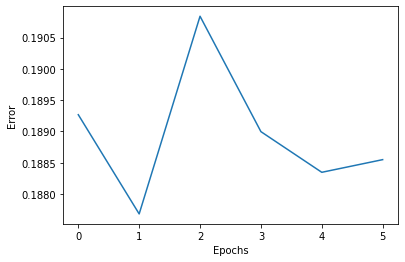

In [44]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)


In [45]:
neural_network.predict(inputs[1]), outputs[1]


(array([0.0002222 , 0.00058143]), array([0.24876785, 0.52380108]))